In [2]:
import numpy as np
import matplotlib.pyplot as plt

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_3156/938166463.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


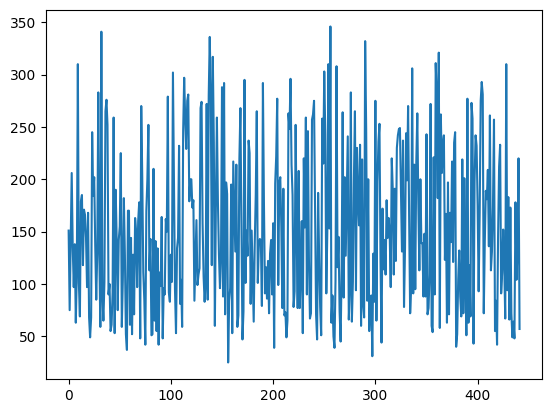

In [3]:
import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()
X,y = data['data'], data['target']

plt.plot(np.arange(y.shape[0]), y)
plt.show()

In [31]:
print('total_samples = ', X.shape)

total_samples =  (442, 10)


(58,)
(58,)


/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_3156/4195492457.py:16: RuntimeWarning: invalid value encountered in divide
  right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)


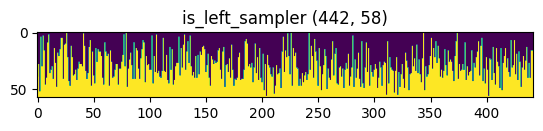

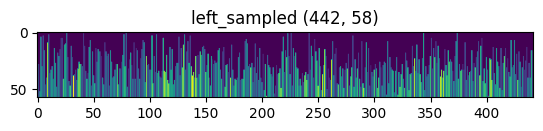

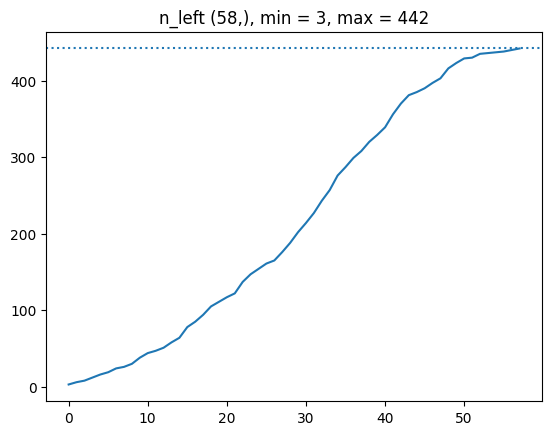

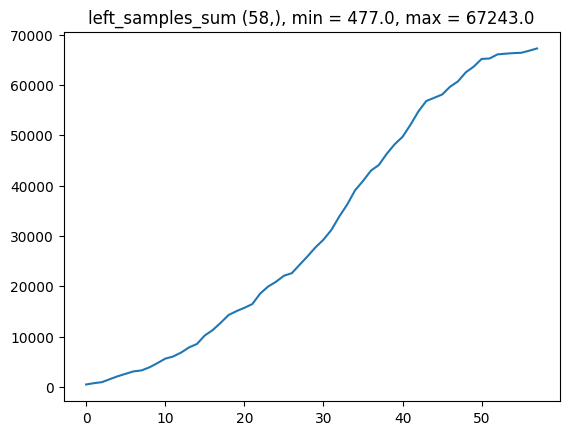

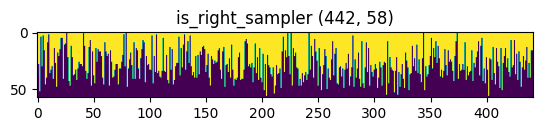

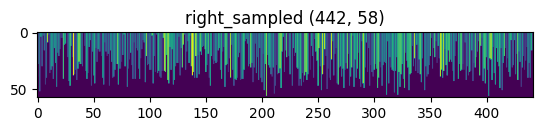

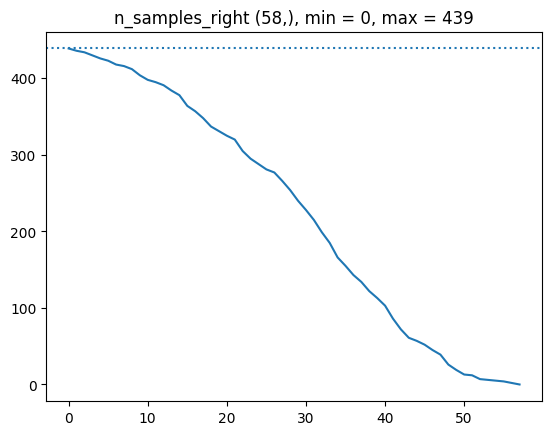

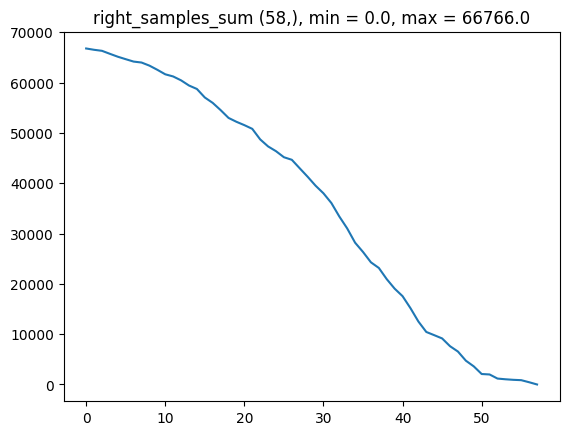

In [17]:
thresh = np.unique(X[:,0]).reshape(1,-1)
selected_feat = X[:,0].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~(is_left_sampler)
stacked_targets = np.hstack([y.reshape(-1,1)] * is_left_sampler.shape[1])
left_sampled = is_left_sampler * stacked_targets
right_sampled = is_right_sampler * stacked_targets

n_samples_left = np.sum(is_left_sampler, axis=0)
n_samples_right = np.sum(is_right_sampler, axis=0)

left_samples_sum = np.sum(left_sampled, axis=0)
right_samples_sum = np.sum(right_sampled, axis=0)

left_samples_mean = np.where(n_samples_left == 0, 0, left_samples_sum / n_samples_left)
right_samples_mean = np.where(n_samples_right == 0, 0, right_samples_sum / n_samples_right)

# Plot for left
plt.imshow(is_left_sampler.T)
plt.title(f'is_left_sampler {is_left_sampler.shape}')
plt.show()

plt.imshow(left_sampled.T)
plt.title(f'left_sampled {left_sampled.shape}')
plt.show()

plt.plot(np.arange(n_samples_left.shape[0]), n_samples_left)
plt.axhline(np.max(n_samples_left), linestyle='dotted')
plt.title(f'n_left {n_samples_left.shape}, min = {np.min(n_samples_left)}, max = {np.max(n_samples_left)}')
plt.show()

plt.plot(np.arange(left_samples_sum.shape[0]), left_samples_sum)
plt.title(f'left_samples_sum {left_samples_sum.shape}, min = {np.min(left_samples_sum)}, max = {np.max(left_samples_sum)}')
plt.show()

# Plot for right
plt.imshow(is_right_sampler.T)
plt.title(f'is_right_sampler {is_right_sampler.shape}')
plt.show()
plt.imshow(right_sampled.T)
plt.title(f'right_sampled {right_sampled.shape}')
plt.show()
plt.plot(np.arange(n_samples_right.shape[0]), n_samples_right)
plt.axhline(np.max(n_samples_right), linestyle='dotted')
plt.title(f'n_samples_right {n_samples_right.shape}, min = {np.min(n_samples_right)}, max = {np.max(n_samples_right)}')
plt.show()

plt.plot(np.arange(right_samples_sum.shape[0]), right_samples_sum)
plt.title(f'right_samples_sum {right_samples_sum.shape}, min = {np.min(right_samples_sum)}, max = {np.max(right_samples_sum)}')
plt.show()


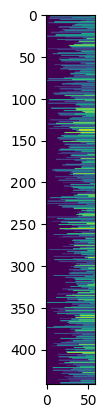

In [35]:
plt.imshow(left_sampled)
plt.show()

/var/folders/1j/chhd52wn0z97rq9skbstg0_00000gn/T/ipykernel_3156/2474144985.py:10: RuntimeWarning: invalid value encountered in divide
  var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)


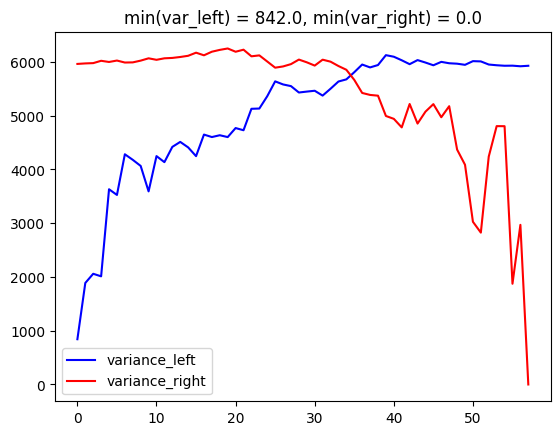

In [36]:
# Variance calculations
var_left = (left_sampled - left_samples_mean.reshape(1,-1)) ** 2
var_right = (right_sampled - right_samples_mean.reshape(1,-1)) ** 2

var_left = np.where(left_sampled == 0, 0, var_left)
var_right = np.where(right_sampled == 0, 0, var_right)

# var_left.shape
var_left = np.where(n_samples_left == 0, 0, np.sum(var_left, axis=0) / n_samples_left)
var_right = np.where(n_samples_right == 0, 0, np.sum(var_right, axis=0) / n_samples_right)

min_var_left = np.min(var_left)
min_var_right = np.min(var_right)
min_var_left = round(float(min_var_left), 2)
min_var_right = round(float(min_var_right), 2)


# var_left.shape
plt.plot(np.arange(var_left.shape[0]), var_left, color='blue', label='variance_left')
plt.plot(np.arange(var_right.shape[0]), var_right, color='red', label='variance_right')
plt.legend()
plt.title(f'min(var_left) = {min_var_left}, min(var_right) = {min_var_right}')
plt.show()

In [33]:
left_sampled.shape

(442, 58)

In [29]:
np.min(var_left)
np.max(var_right)

5929.884896910383

$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}^{T}
\cdot
\begin{bmatrix}
i_{11} i_{12} i_{13} \\
i_{21} i_{22} i_{23} \\
i_{31} i_{32} i_{33} \\
\end{bmatrix}
$

$
\begin{bmatrix}
x_1
x_2
x_3 
\end{bmatrix}
\cdot
\begin{bmatrix}
i_{11} i_{12} i_{13} \\
i_{21} i_{22} i_{23} \\
i_{31} i_{32} i_{33} \\
\end{bmatrix}
$

In [18]:
X.shape

(442, 10)

In [2]:
# Create a function that returns left and right indicators
